In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel file
df = pd.read_excel(r'C:\Users\paras\Desktop\files\Combined_Data.xlsx', header=None)  # Assuming no header row

# Assign column names for clarity (column indices start from 0)
df.columns = ['Time_Days', 'Time_Seconds', 'MFC1', 'MFC2', 'MFC4', 'MFC3', 'extra']
df['average'] = df[['MFC1', 'MFC2', 'MFC4', 'MFC3']].mean(axis=1)
df['average withour MFC 2'] = df[['MFC1', 'MFC4', 'MFC3']].mean(axis=1)

In [50]:
# Define the events with their times (in seconds) and descriptions
events = [
    {'time_seconds': 3824006132.282, 'desc': 'Polarization curve\nof Single MFC\n(5 March 2025)', 'color': 'black'},
    {'time_seconds': 3824701394.467, 'desc': 'All electrodes\nchanged to\ngraphite felt\n(12 March 2025)', 'color': 'green'},
    {'time_seconds': 3825031629.751, 'desc': 'OCV and\nPolarization curve\n(17 March)', 'color': 'green'},
    {'time_seconds': 3825040890.75, 'desc': 'Polarization curve\n(17 March)', 'color': 'green'}
]

# Find the corresponding days for each event by matching with Time_Seconds column
for event in events:
    match = df[df['Time_Seconds'] == event['time_seconds']]
    if not match.empty:
        event['time_days'] = match.iloc[0]['Time_Days']
    else:
        # Find the closest time if exact match not found
        idx = (df['Time_Seconds'] - event['time_seconds']).abs().idxmin()
        event['time_days'] = df.loc[idx, 'Time_Days']
        print(f"Note: Exact time {event['time_seconds']} not found, using closest match at {event['time_days']} days")

In [45]:
std_dev_without_mfc2 = df[['MFC1', 'MFC3', 'MFC4']].std(axis=1)
std_dev = df[['MFC1', 'MFC2', 'MFC3', 'MFC4']].std(axis=1)

In [46]:
df['power MFC1'] = df['MFC1']**2*10000000/12000
df['power MFC2'] = df['MFC2']**2*10000000/5600
df['power MFC3'] = df['MFC3']**2*10000000/12000
df['power MFC4'] = df['MFC4']**2*10000000/5600
df['power average without MFC 2'] = df[['power MFC1', 'power MFC3', 'power MFC4']].mean(axis=1)
df['power average'] = df[['power MFC1', 'power MFC2', 'power MFC3', 'power MFC4']].mean(axis=1)


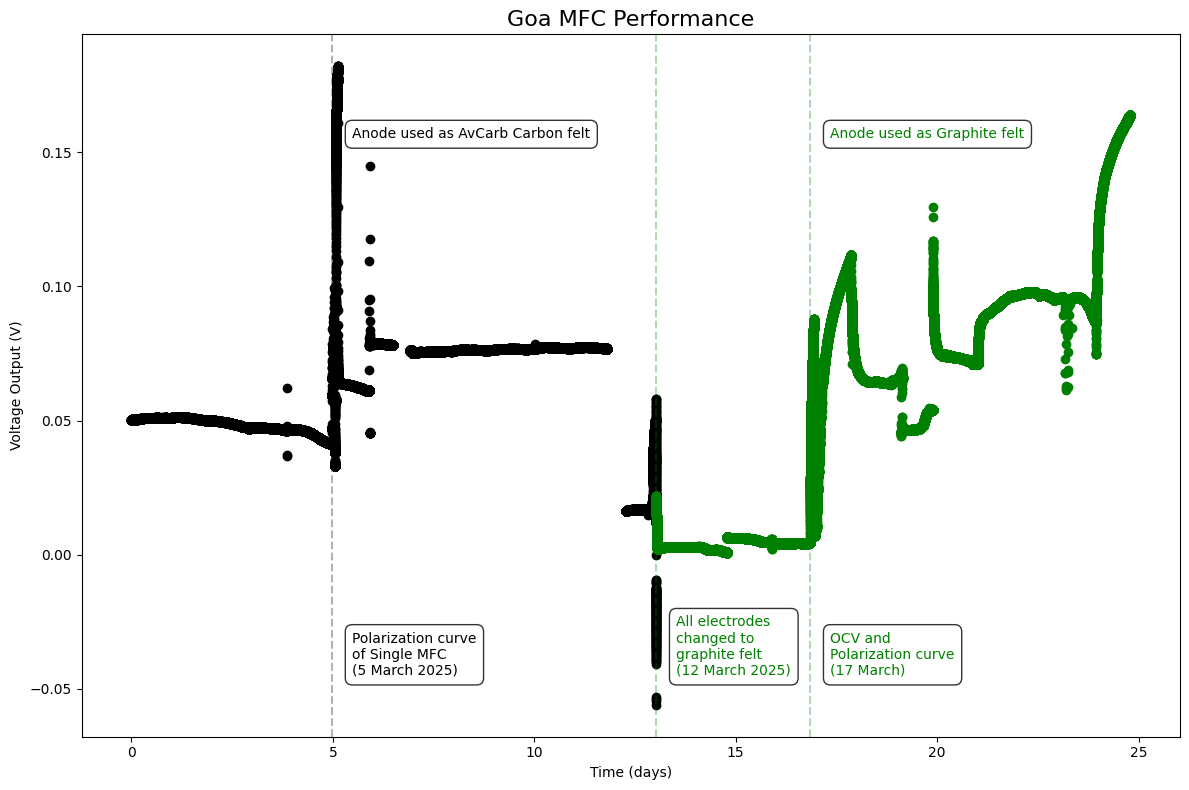

In [52]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data with color changes at each event
current_color = 'black'  # Initial color
prev_event_day = df['Time_Days'].min()  # Start from first data point

for i, event in enumerate(events):
    # Get data between previous event and current event
    mask = (df['Time_Days'] >= prev_event_day) & (df['Time_Days'] < event['time_days'])
    
    # Plot MFC data for this period
    ax.scatter(df[mask]['Time_Days'], df[mask]['average withour MFC 2'], color=current_color, label='Average voltage output without MFC 2' if i == 0 else None)
    # ax.errorbar(df[mask]['Time_Days'], df[mask]['average withour MFC 2'], yerr=std_dev[mask], fmt='o', color=current_color, label=f'MFC1 ({current_color})' if i == 0 else None, capsize=3, elinewidth=1, markeredgewidth=1)
    # ax.scatter(df[mask]['Time_Days'], df[mask]['MFC2'], color=current_color, label=f'MFC2 ({current_color})' if i == 0 else None)
    # ax.scatter(df[mask]['Time_Days'], df[mask]['MFC4'], color=current_color, label=f'MFC4 ({current_color})' if i == 0 else None)
    # ax.scatter(df[mask]['Time_Days'], df[mask]['MFC3'], color=current_color, label=f'MFC3 ({current_color})' if i == 0 else None)
    
    # Update for next period
    prev_event_day = event['time_days']
    current_color = event['color']

# Plot data after last event
mask = (df['Time_Days'] >= prev_event_day)
ax.scatter(df[mask]['Time_Days'], df[mask]['average withour MFC 2'], color=current_color)
# ax.scatter(df[mask]['Time_Days'], df[mask]['MFC2'], color=current_color)
# ax.scatter(df[mask]['Time_Days'], df[mask]['MFC4'], color=current_color)
# ax.scatter(df[mask]['Time_Days'], df[mask]['MFC3'], color=current_color)

# Add vertical arrows and annotations for each event
temp=0
name = ''
count = 0
for event in events:
    count+=1
    x = event['time_days']
    if x-temp < 0.5:
        name = 'OCV and\nPolarization curve\n(17 March)'
        pass
    else:
        temp = x
        ax.axvline(x=event['time_days'], color=event['color'], linestyle='--', alpha=0.3)
        ax.annotate(event['desc'] if name == '' else name, 
                    # xy=(event['time_days'], ax.get_ylim()[1]),
                    xy = (event['time_days']+0.5, -0.05),
                    xytext=(0, 10), textcoords='offset points',
                    # arrowprops=dict(arrowstyle='->', color=event['color']),
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
                    color=event['color'])
        
        if count==1:
            ax.annotate(('Anode used as AvCarb Carbon felt'),
                    xy = (event['time_days']+0.5, 0.15),
                    xytext=(0, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
                    color=event['color'])
        elif count==3:
            ax.annotate(('Anode used as Graphite felt'),
                    xy = (event['time_days']+0.5, 0.15),
                    xytext=(0, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
                    color=event['color'])
        if name != '':
            name = ''

# Set labels and title
ax.set_xlabel('Time (days)')
ax.set_ylabel('Voltage Output (V)')
ax.set_title('Goa MFC Performance', fontsize=16)
# ax.legend()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

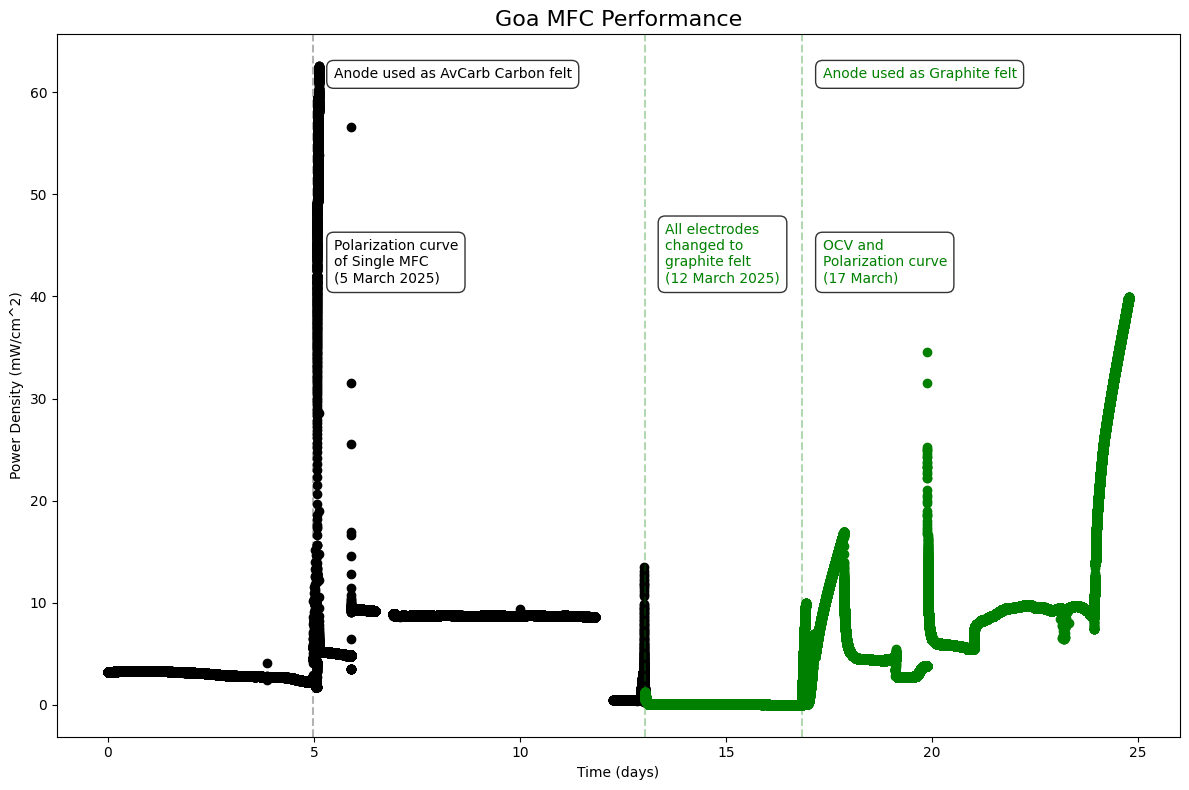

In [56]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data with color changes at each event
current_color = 'black'  # Initial color
prev_event_day = df['Time_Days'].min()  # Start from first data point

for i, event in enumerate(events):
    # Get data between previous event and current event
    mask = (df['Time_Days'] >= prev_event_day) & (df['Time_Days'] < event['time_days'])
    
    # Plot MFC data for this period
    ax.scatter(df[mask]['Time_Days'], df[mask]['power average without MFC 2'], color=current_color, label='Average power output without MFC 2' if i == 0 else None)
    # ax.errorbar(df[mask]['Time_Days'], df[mask]['average withour MFC 2'], yerr=std_dev[mask], fmt='o', color=current_color, label=f'MFC1 ({current_color})' if i == 0 else None, capsize=3, elinewidth=1, markeredgewidth=1)
    # ax.scatter(df[mask]['Time_Days'], df[mask]['MFC2'], color=current_color, label=f'MFC2 ({current_color})' if i == 0 else None)
    # ax.scatter(df[mask]['Time_Days'], df[mask]['MFC4'], color=current_color, label=f'MFC4 ({current_color})' if i == 0 else None)
    # ax.scatter(df[mask]['Time_Days'], df[mask]['MFC3'], color=current_color, label=f'MFC3 ({current_color})' if i == 0 else None)
    
    # Update for next period
    prev_event_day = event['time_days']
    current_color = event['color']

# Plot data after last event
mask = (df['Time_Days'] >= prev_event_day)
ax.scatter(df[mask]['Time_Days'], df[mask]['power average without MFC 2'], color=current_color)
# ax.scatter(df[mask]['Time_Days'], df[mask]['MFC2'], color=current_color)
# ax.scatter(df[mask]['Time_Days'], df[mask]['MFC4'], color=current_color)
# ax.scatter(df[mask]['Time_Days'], df[mask]['MFC3'], color=current_color)

# Add vertical arrows and annotations for each event
temp=0
name = ''
count = 0
for event in events:
    count+=1
    x = event['time_days']
    if x-temp < 0.5:
        name = 'OCV and\nPolarization curve\n(17 March)'
        pass
    else:
        temp = x
        ax.axvline(x=event['time_days'], color=event['color'], linestyle='--', alpha=0.3)
        ax.annotate(event['desc'] if name == '' else name, 
                    # xy=(event['time_days'], ax.get_ylim()[1]),
                    xy = (event['time_days']+0.5, 40),
                    xytext=(0, 10), textcoords='offset points',
                    # arrowprops=dict(arrowstyle='->', color=event['color']),
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
                    color=event['color'])
        
        if count==1:
            ax.annotate(('Anode used as AvCarb Carbon felt'),
                    xy = (event['time_days']+0.5, 60),
                    xytext=(0, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
                    color=event['color'])
        elif count==3:
            ax.annotate(('Anode used as Graphite felt'),
                    xy = (event['time_days']+0.5, 60),
                    xytext=(0, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
                    color=event['color'])

# Set labels and title
ax.set_xlabel('Time (days)')
ax.set_ylabel('Power Density (mW/cm^2)')
ax.set_title('Goa MFC Performance', fontsize=16)
# ax.legend()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

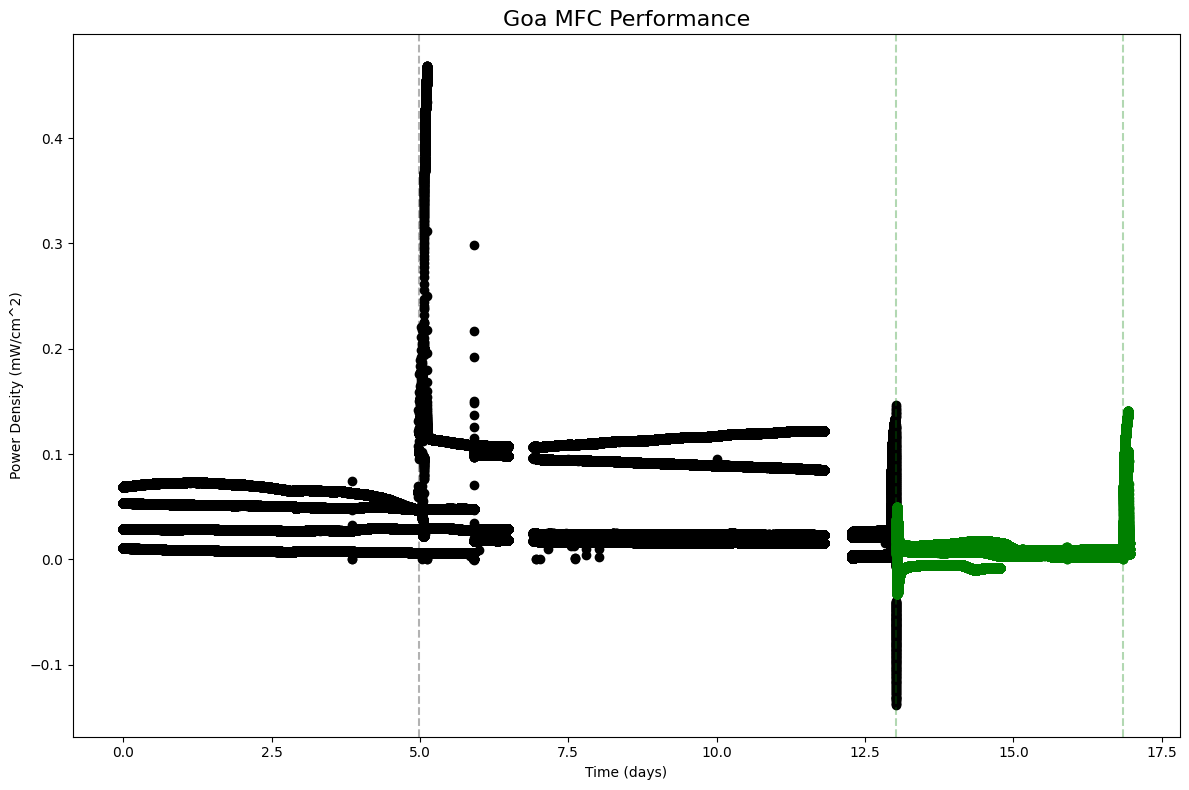

In [58]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data with color changes at each event
current_color = 'black'  # Initial color
prev_event_day = df['Time_Days'].min()  # Start from first data point

for i, event in enumerate(events):
    # Get data between previous event and current event
    mask = (df['Time_Days'] >= prev_event_day) & (df['Time_Days'] < event['time_days'])
    
    # Plot MFC data for this period
    ax.scatter(df[mask]['Time_Days'], df[mask]['MFC1'], color=current_color, label=f'MFC2 ({current_color})' if i == 0 else None)
    # ax.errorbar(df[mask]['Time_Days'], df[mask]['average withour MFC 2'], yerr=std_dev[mask], fmt='o', color=current_color, label=f'MFC1 ({current_color})' if i == 0 else None, capsize=3, elinewidth=1, markeredgewidth=1)
    ax.scatter(df[mask]['Time_Days'], df[mask]['MFC2'], color=current_color, label=f'MFC2 ({current_color})' if i == 0 else None)
    ax.scatter(df[mask]['Time_Days'], df[mask]['MFC4'], color=current_color, label=f'MFC4 ({current_color})' if i == 0 else None)
    ax.scatter(df[mask]['Time_Days'], df[mask]['MFC3'], color=current_color, label=f'MFC3 ({current_color})' if i == 0 else None)
    
    # Update for next period
    prev_event_day = event['time_days']
    current_color = event['color']

# Plot data after last event
mask = (df['Time_Days'] >= prev_event_day)
# ax.scatter(df[mask]['Time_Days'], df[mask]['power average without MFC 2'], color=current_color)
# ax.scatter(df[mask]['Time_Days'], df[mask]['MFC2'], color=current_color)
# ax.scatter(df[mask]['Time_Days'], df[mask]['MFC4'], color=current_color)
# ax.scatter(df[mask]['Time_Days'], df[mask]['MFC3'], color=current_color)

# Add vertical arrows and annotations for each event
temp=0
name = ''
count = 0
for event in events:
    count+=1
    x = event['time_days']
    if x-temp < 0.5:
        name = 'OCV and\nPolarization curve\n(17 March)'
        pass
    else:
        temp = x
        ax.axvline(x=event['time_days'], color=event['color'], linestyle='--', alpha=0.3)
        ax.annotate(event['desc'] if name == '' else name, 
                    # xy=(event['time_days'], ax.get_ylim()[1]),
                    xy = (event['time_days']+0.5, 40),
                    xytext=(0, 10), textcoords='offset points',
                    # arrowprops=dict(arrowstyle='->', color=event['color']),
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
                    color=event['color'])
        
        if count==1:
            ax.annotate(('Anode used as AvCarb Carbon felt'),
                    xy = (event['time_days']+0.5, 60),
                    xytext=(0, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
                    color=event['color'])
        elif count==3:
            ax.annotate(('Anode used as Graphite felt'),
                    xy = (event['time_days']+0.5, 60),
                    xytext=(0, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
                    color=event['color'])

# Set labels and title
ax.set_xlabel('Time (days)')
ax.set_ylabel('Power Density (mW/cm^2)')
ax.set_title('Goa MFC Performance', fontsize=16)
# ax.legend()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

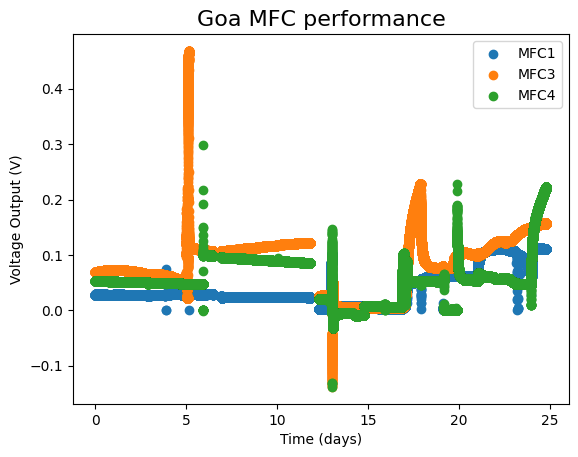

In [71]:
plt.scatter(df['Time_Days'], df['MFC1'], label='MFC1')
plt.scatter(df['Time_Days'], df['MFC3'], label='MFC3')
plt.scatter(df['Time_Days'], df['MFC4'], label='MFC4')
# plt.plot(df['MFC2'])
# plt.plot(df['MFC3'], df['Time_days'])
# plt.plot(df['MFC4'], df['Time_days'])

plt.title('Goa MFC performance', fontsize=16)
plt.ylabel('Voltage Output (V)')
plt.xlabel('Time (days)')
plt.legend()